# Tugas Besar 2 IF3170 - Intelegensi Buatan
## Kelompok Butuh Passingan
### Nama Anggota :
1. Andreas Halim - 13516003
2. Dafi Ihsandiya Faraz - 13516057
3. Aldo Azali - 13516125
4. Untung Tanujaya - 13516135 
5. Jeffry - 13516156

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('tubes2_HeartDisease_train.csv', na_values='?')
dg = pd.read_csv('tubes2_HeartDisease_test.csv', na_values='?')
df.shape

(779, 14)

In [3]:
df.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14
0,54,1,4,125.0,216.0,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,1
1,55,1,4,158.0,217.0,0.0,0.0,110.0,1.0,2.5,2.0,NaN,NaN,1
2,54,0,3,135.0,304.0,1.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0,0
3,48,0,3,120.0,195.0,0.0,0.0,125.0,0.0,0.0,NaN,NaN,NaN,0
4,50,1,4,120.0,0.0,0.0,1.0,156.0,1.0,0.0,1.0,NaN,6.0,3


In [4]:
df.columns = ['Age', 'Sex', 'Chest-Pain_Type', 'Resting_Blood_Pressure', 'Serum_Cholestrol', 'Fasting_Blood_Sugar_120',
       'resting_ECG', 'Max-Heart_Rate_Achieved', 'Exercise_Induced_Angina', 'ST_Depression', 'Peak_Exercise', 'Number_Major_Vessels',
       'Thal', 'Diagnosis_HD']
dg.columns = ['Age', 'Sex', 'Chest-Pain_Type', 'Resting_Blood_Pressure', 'Serum_Cholestrol', 'Fasting_Blood_Sugar_120',
       'resting_ECG', 'Max-Heart_Rate_Achieved', 'Exercise_Induced_Angina', 'ST_Depression', 'Peak_Exercise', 'Number_Major_Vessels',
       'Thal']

In [5]:
dg.head()

,Age,Sex,Chest-Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol,Fasting_Blood_Sugar_120,resting_ECG,Max-Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,Peak_Exercise,Number_Major_Vessels,Thal
0,60,1,2,160.0,267.0,1.0,1,157.0,0.0,0.5,2.0,NaN,NaN
1,61,1,4,148.0,203.0,0.0,0,161.0,0.0,0.0,1.0,1.0,7.0
2,54,1,4,130.0,242.0,0.0,0,91.0,1.0,1.0,2.0,NaN,NaN
3,48,1,4,120.0,260.0,0.0,0,115.0,0.0,2.0,2.0,NaN,NaN
4,57,0,1,130.0,308.0,0.0,0,98.0,0.0,1.0,2.0,NaN,NaN


## Data Preprocessing

### Check Null Values
If there is null values, then change it to :
1. Median
2. dummy value (ex : 'Empty' OR '?')
3. mode

In [6]:
# NaN data to Median
# from sklearn.preprocessing import Imputer
# imputer = Imputer(strategy='median')
# pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [7]:
df.isnull().sum()

Age                          0
Sex                          0
Chest-Pain_Type              0
Resting_Blood_Pressure      47
Serum_Cholestrol            24
Fasting_Blood_Sugar_120     78
resting_ECG                  2
Max-Heart_Rate_Achieved     44
Exercise_Induced_Angina     44
ST_Depression               49
Peak_Exercise              262
Number_Major_Vessels       514
Thal                       408
Diagnosis_HD                 0
dtype: int64

In [8]:
# RBP, SC, MHRA, STD,  = median
# FBS, ecg, EIA, pe, NMV, thal = mode
# fbs, ECG , eia, PE,nmv, THAL = 'Empty'
rbp_med = df['Resting_Blood_Pressure'].median()
sc_med = df['Serum_Cholestrol'].median()
mhra_med = df['Max-Heart_Rate_Achieved'].median()
std_med = df['ST_Depression'].median()
# fbs_mod = df['Fasting_Blood_Sugar_120'].mode()
# ecg_mod = df['resting_ECG '].mode()
# eia_mod = df['Exercise_Induced_Angina'].mode()
# pe_mod = df['Peak_Exercise'].mode()
# nmv_mod = df['Number_Major_Vessels'].mode()
# thal_mod = df['Thal'].mode()

In [9]:
# Fill with median
df['Resting_Blood_Pressure'] = df['Resting_Blood_Pressure'].fillna(rbp_med)
df['Serum_Cholestrol'] = df['Serum_Cholestrol'].fillna(sc_med)
df['Max-Heart_Rate_Achieved'] = df['Max-Heart_Rate_Achieved'].fillna(mhra_med)
df['ST_Depression'] = df['ST_Depression'].fillna(std_med)
# Others Fill with '?'
df = df.fillna('?')

In [10]:
rbp_medg = dg['Resting_Blood_Pressure'].median()
sc_medg = dg['Serum_Cholestrol'].median()
mhra_medg = dg['Max-Heart_Rate_Achieved'].median()
std_medg = dg['ST_Depression'].median()

In [11]:
# Fill with median
dg['Resting_Blood_Pressure'] = dg['Resting_Blood_Pressure'].fillna(rbp_medg)
dg['Serum_Cholestrol'] = dg['Serum_Cholestrol'].fillna(sc_medg)
dg['Max-Heart_Rate_Achieved'] = dg['Max-Heart_Rate_Achieved'].fillna(mhra_medg)
dg['ST_Depression'] = dg['ST_Depression'].fillna(std_medg)
# Others Fill with '?'
dg = dg.fillna('?')

In [12]:
dg.isnull().sum()

Age                        0
Sex                        0
Chest-Pain_Type            0
Resting_Blood_Pressure     0
Serum_Cholestrol           0
Fasting_Blood_Sugar_120    0
resting_ECG                0
Max-Heart_Rate_Achieved    0
Exercise_Induced_Angina    0
ST_Depression              0
Peak_Exercise              0
Number_Major_Vessels       0
Thal                       0
dtype: int64

### Create Data Split Train and Data Split Test(90:10)

In [13]:
from scipy.stats import ttest_ind

In [14]:
y_train = df['Diagnosis_HD']  # yang ingin diprediksi
X_train = df.drop(['Diagnosis_HD'], axis = 1)

In [15]:
from sklearn.model_selection import train_test_split
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size = 0.25, random_state=123)
X_train_split.head()

,Age,Sex,Chest-Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol,Fasting_Blood_Sugar_120,resting_ECG,Max-Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression,Peak_Exercise,Number_Major_Vessels,Thal
560,37,0,3,130.0,211.0,0,0,142.0,0,0.0,?,?,?
526,71,1,4,130.0,221.0,0,1,115.0,1,0.0,?,?,?
521,52,1,4,135.0,0.0,?,0,128.0,1,2.0,2,?,7
317,53,0,4,130.0,264.0,0,2,143.0,0,4.0,2,0,3
31,58,0,4,100.0,248.0,0,2,122.0,0,1.0,2,0,3


In [16]:
y_train_split.head()

560    0
526    3
521    2
317    0
31     0
Name: Diagnosis_HD, dtype: int64

### Create Data Full Train and Data Test

In [17]:
#TBD

## Data Processing

### Feature Engineering

In [18]:
# TBD

### Make Dummies

In [19]:
X_train_split = pd.get_dummies(X_train_split)
X_test_split = pd.get_dummies(X_test_split)

In [20]:
X_train_split.head()

,Age,Sex,Chest-Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol,Max-Heart_Rate_Achieved,ST_Depression,Fasting_Blood_Sugar_120_0.0,Fasting_Blood_Sugar_120_1.0,Fasting_Blood_Sugar_120_?,...,Peak_Exercise_?,Number_Major_Vessels_0.0,Number_Major_Vessels_1.0,Number_Major_Vessels_2.0,Number_Major_Vessels_3.0,Number_Major_Vessels_?,Thal_3.0,Thal_6.0,Thal_7.0,Thal_?
560,37,0,3,130.0,211.0,142.0,0.0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
526,71,1,4,130.0,221.0,115.0,0.0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
521,52,1,4,135.0,0.0,128.0,2.0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
317,53,0,4,130.0,264.0,143.0,4.0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
31,58,0,4,100.0,248.0,122.0,1.0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [21]:
null_in_test = list(set(X_train_split.columns) - set(X_test_split.columns))
null_in_train = list(set(X_test_split.columns) - set(X_train_split.columns))
print(null_in_test)
print(null_in_train)

['resting_ECG_?']
[]


In [22]:
for col in null_in_test:
    X_test_split[col] = 0

In [23]:
null_in_test = list(set(X_train_split.columns) - set(X_test_split.columns))
null_in_train = list(set(X_test_split.columns) - set(X_train_split.columns))
print(null_in_test)
print(null_in_train)

[]
[]


### Modeling with ML

In [24]:
from sklearn.metrics import accuracy_score

#### KNN (K Nearest Neighbors)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [26]:
knn.fit(X_train_split, y_train_split)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [27]:
predict_knn = knn.predict(X_test_split)

In [28]:
predict_knn[0:20]

array([3, 0, 1, 1, 1, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [29]:
y_test_split[0:20]

166    3
375    1
594    0
639    2
677    3
499    0
307    0
230    1
57     0
396    3
55     0
134    1
272    4
289    0
389    0
673    1
632    0
728    3
162    0
164    0
Name: Diagnosis_HD, dtype: int64

In [30]:
print('Nilai akurasi knn  : ', accuracy_score(y_test_split, predict_knn))

Nilai akurasi knn  :  0.48717948717948717


In [31]:
knn.score(X_train_split ,y_train_split)

0.6215753424657534

In [32]:
knn.score(X_test_split ,y_test_split)

0.48717948717948717

### Model yang lain

In [33]:
#Import required libraries 
import keras #library for neural network

Using TensorFlow backend.


In [34]:
# Neural network module
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout 
from keras.layers.normalization import BatchNormalization 
from keras.utils import np_utils

In [35]:
# making model
model = Sequential()

# Input - Layer
model.add(Dense(50, activation = "relu", input_shape=(30, )))

# Hidden - Layers
model.add(Dropout(0.3))
model.add(Dense(50, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(50, activation = "relu"))

# Output- Layer
model.add(Dense(1, activation = "sigmoid"))

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                1550      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 6,701
Trainable params: 6,701
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

In [38]:
result = model.fit(X_train_split,y_train_split,validation_data=(X_test_split,y_test_split),batch_size=20,epochs=10,verbose=1)

Train on 584 samples, validate on 195 samples
Epoch 1/10
584/584 [==============================] - 2s 4ms/step - loss: 1.2523 - acc: 0.3151 - val_loss: -0.1635 - val_acc: 0.2667
Epoch 2/10
584/584 [==============================] - 0s 131us/step - loss: 0.3038 - acc: 0.2962 - val_loss: -0.1635 - val_acc: 0.2667
Epoch 3/10
584/584 [==============================] - 0s 122us/step - loss: 0.2883 - acc: 0.2962 - val_loss: -0.1635 - val_acc: 0.2667
Epoch 4/10
584/584 [==============================] - 0s 117us/step - loss: 0.2093 - acc: 0.2962 - val_loss: -0.1635 - val_acc: 0.2667
Epoch 5/10
584/584 [==============================] - 0s 102us/step - loss: 0.1331 - acc: 0.3065 - val_loss: -0.6132 - val_acc: 0.2667
Epoch 6/10
584/584 [==============================] - 0s 117us/step - loss: 0.0729 - acc: 0.3185 - val_loss: -1.6825 - val_acc: 0.2667
Epoch 7/10
584/584 [==============================] - 0s 82us/step - loss: -0.6910 - acc: 0.3305 - val_loss: -1.1919 - val_acc: 0.4564
Epoch 8/10


In [39]:
print(np.mean(result.history["val_acc"]))

0.3020512854441619


### MLP SKLEARN

In [48]:
from sklearn.neural_network import MLPClassifier

In [66]:
# train, and plot the accuracy
from sklearn.metrics import accuracy_score

val_accuracy_test = []
val_accuracy_train = []
for i in range(10):
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100, 2), random_state=1, max_iter=10, warm_start=True, activation='tanh')
    clf.fit(X_train_split, y_train_split)
    y_predict_test = clf.predict(X_test_split)
    performance_test = accuracy_score(y_predict_test, y_test_split)
    val_accuracy_test.append(performance_test)
    y_predict_train = clf.predict(X_train_split)
    performance_train = accuracy_score(y_predict_train, y_train_split)
    val_accuracy_train.append(performance_train)

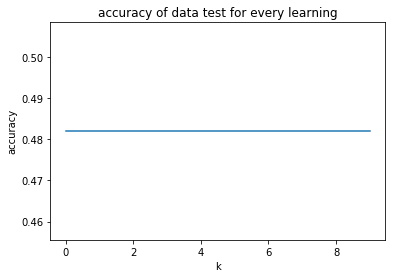

In [69]:
plt.title('accuracy of data test for every learning')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(val_accuracy_test)

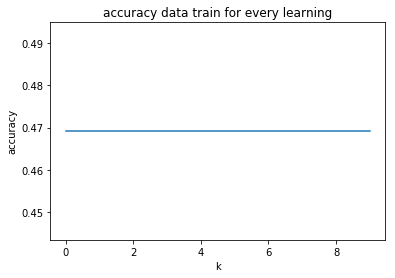

In [70]:
plt.title('accuracy data train for every learning')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(val_accuracy_train)